In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gamma, lognorm

covid_cases_data=pd.read_csv("covid_confirmed_usafacts.csv")
covid_cases_df=pd.DataFrame(covid_cases_data)
newjersey_data=covid_cases_df[covid_cases_df['State']=='NJ']
print("Number of rows:", newjersey_data.shape[0])
print("Number of columns:", newjersey_data.shape[1])

newjersey_data.head(22)

Number of rows: 22
Number of columns: 1269


,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
1804,0,Statewide Unallocated,NJ,34,0,0,0,0,0,0,...,1608,1608,1608,1608,1608,1608,1608,1608,1608,1608
1805,34001,Atlantic County,NJ,34,0,0,0,0,0,0,...,89852,89852,89852,89852,89852,89852,89852,89852,89852,89852
1806,34003,Bergen County,NJ,34,0,0,0,0,0,0,...,320734,320734,320734,320734,320734,320734,320734,320734,320734,320734
1807,34005,Burlington County,NJ,34,0,0,0,0,0,0,...,138798,138798,138798,138798,138798,138798,138798,138798,138798,138798
1808,34007,Camden County,NJ,34,0,0,0,0,0,0,...,166044,166044,166044,166044,166044,166044,166044,166044,166044,166044
1809,34009,Cape May County,NJ,34,0,0,0,0,0,0,...,29823,29823,29823,29823,29823,29823,29823,29823,29823,29823
1810,34011,Cumberland County,NJ,34,0,0,0,0,0,0,...,51414,51414,51414,51414,51414,51414,51414,51414,51414,51414
1811,34013,Essex County,NJ,34,0,0,0,0,0,0,...,287354,287354,287354,287354,287354,287354,287354,287354,287354,287354
1812,34015,Gloucester County,NJ,34,0,0,0,0,0,0,...,89819,89819,89819,89819,89819,89819,89819,89819,89819,89819
1813,34017,Hudson County,NJ,34,0,0,0,0,0,0,...,234993,234993,234993,234993,234993,234993,234993,234993,234993,234993


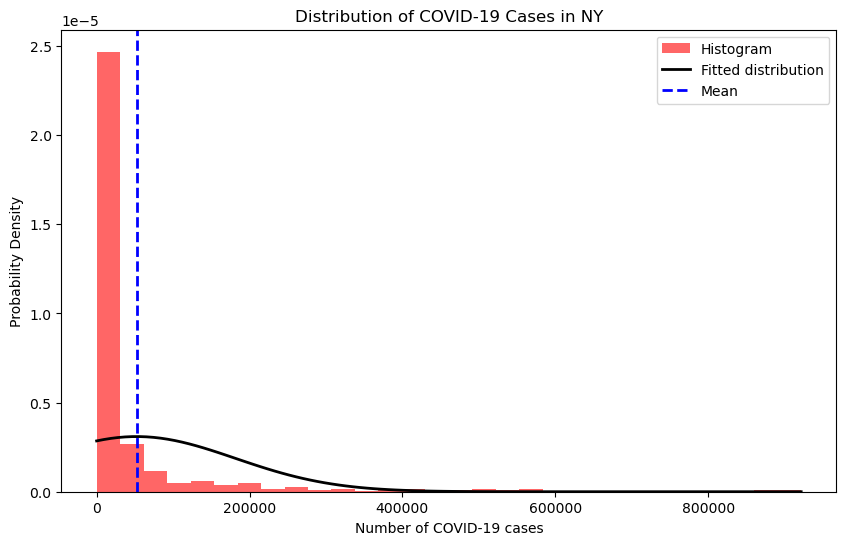

Statistics for NY:
Mean: 52316.36694899303
Variance: 16614917155.712536
Skewness: 4.055979055579067
Kurtosis: 18.03388071309114


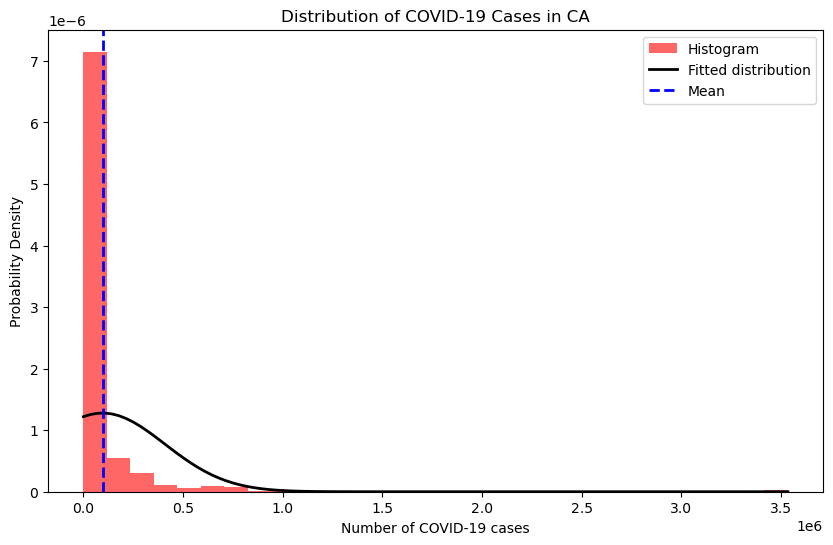

Statistics for CA:
Mean: 96084.468587124
Variance: 97393286286.88629
Skewness: 7.768969821058437
Kurtosis: 72.11839293327415


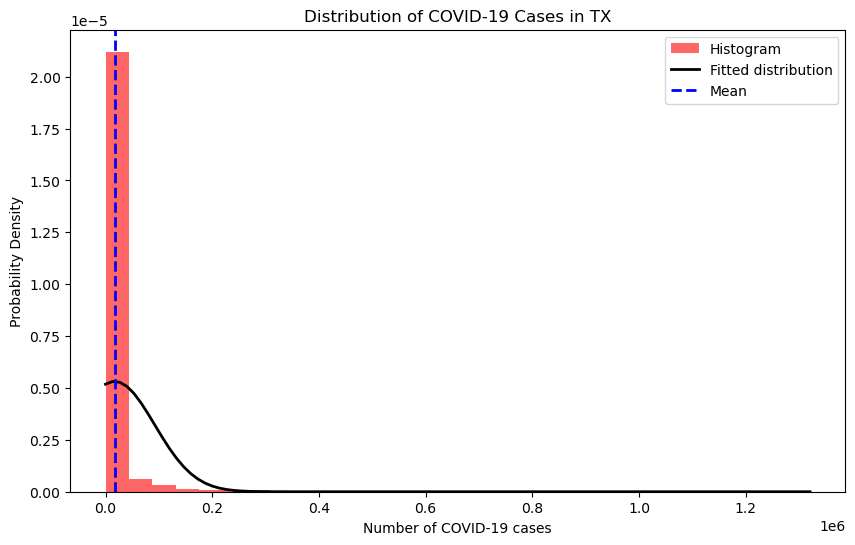

Statistics for TX:
Mean: 17177.3597085949
Variance: 5626004477.294088
Skewness: 9.894635293298025
Kurtosis: 124.2173786818857


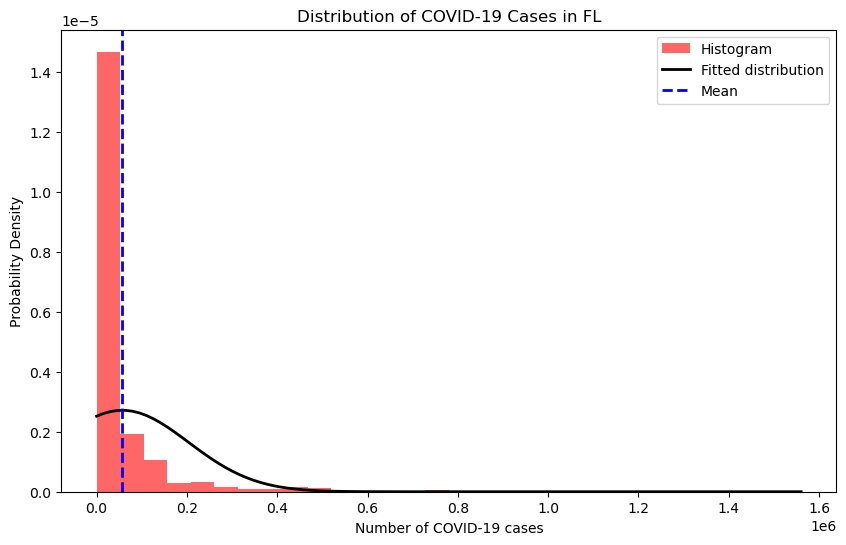

Statistics for FL:
Mean: 56864.541560102305
Variance: 21539543606.641594
Skewness: 6.133121388833411
Kurtosis: 48.25202288865914


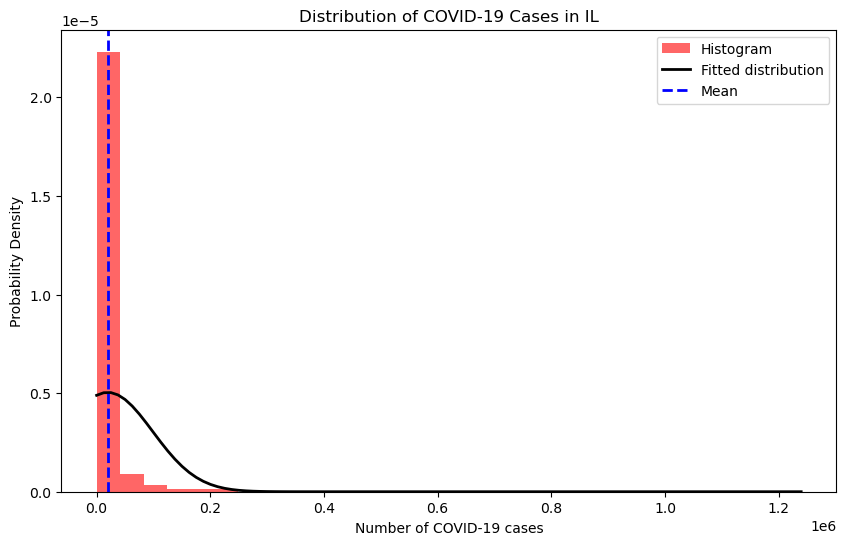

Statistics for IL:
Mean: 19484.72546912775
Variance: 6266489977.034943
Skewness: 9.61014227035817
Kurtosis: 110.87845603722461


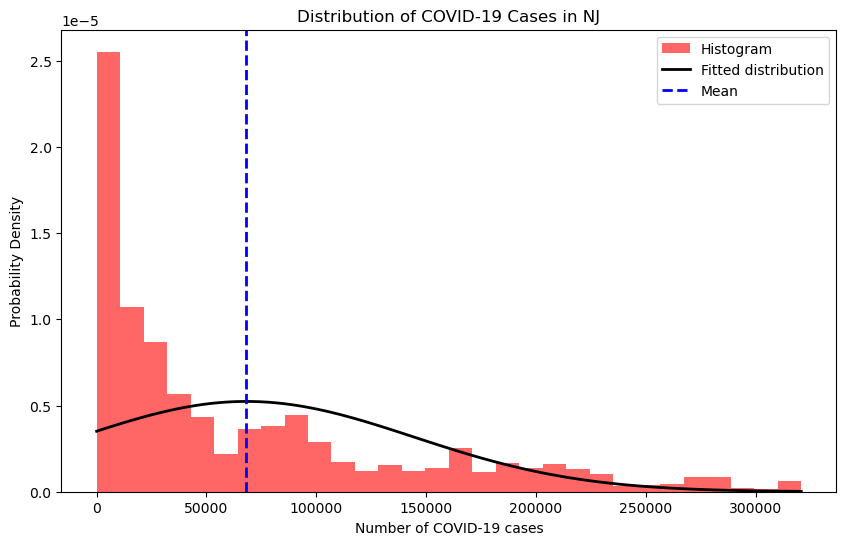

Statistics for NJ:
Mean: 68179.8922745239
Variance: 5802582068.19134
Skewness: 1.3004041950738874
Kurtosis: 0.8507413577975398


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, skew, kurtosis

states = ['NY', 'CA', 'TX', 'FL', 'IL', 'NJ']
for state in states:
    covid_cases_data = pd.read_csv("covid_confirmed_usafacts.csv")
    covid_cases_df = pd.DataFrame(covid_cases_data)

    # Filter data for the selected state
    state_data = covid_cases_df[covid_cases_df['State'] == state]

    # Extract COVID-19 cases data
    cases = state_data.iloc[:, 4:].values.flatten()

    # Fit a distribution to the COVID-19 cases data
    fit_params = norm.fit(cases)  # Example: Fit a normal distribution

    # Generate data points for the fitted distribution
    x = np.linspace(min(cases), max(cases), 100)
    pdf_fitted = norm.pdf(x, *fit_params)

    # Plot histogram of the COVID-19 cases data
    plt.figure(figsize=(10, 6))
    plt.hist(cases, bins=30, density=True, alpha=0.6, color='r', label='Histogram')

    # Plot the fitted distribution
    plt.plot(x, pdf_fitted, 'k-', lw=2, label='Fitted distribution')

    # Add a vertical line at the mean of the fitted distribution
    mean_value = fit_params[0]
    plt.axvline(mean_value, color='b', linestyle='--', linewidth=2, label='Mean')

    # Add labels and legend
    plt.xlabel('Number of COVID-19 cases')
    plt.ylabel('Probability Density')
    plt.title(f'Distribution of COVID-19 Cases in {state}')
    plt.legend()

    # Show plot
    plt.show()

    # Calculate distribution statistics
    variance = fit_params[1]**2
    skewness = skew(cases)
    kurtosis_value = kurtosis(cases)
    print(f"Statistics for {state}:")
    print("Mean:", mean_value)
    print("Variance:", variance)
    print("Skewness:", skewness)
    print("Kurtosis:", kurtosis_value)

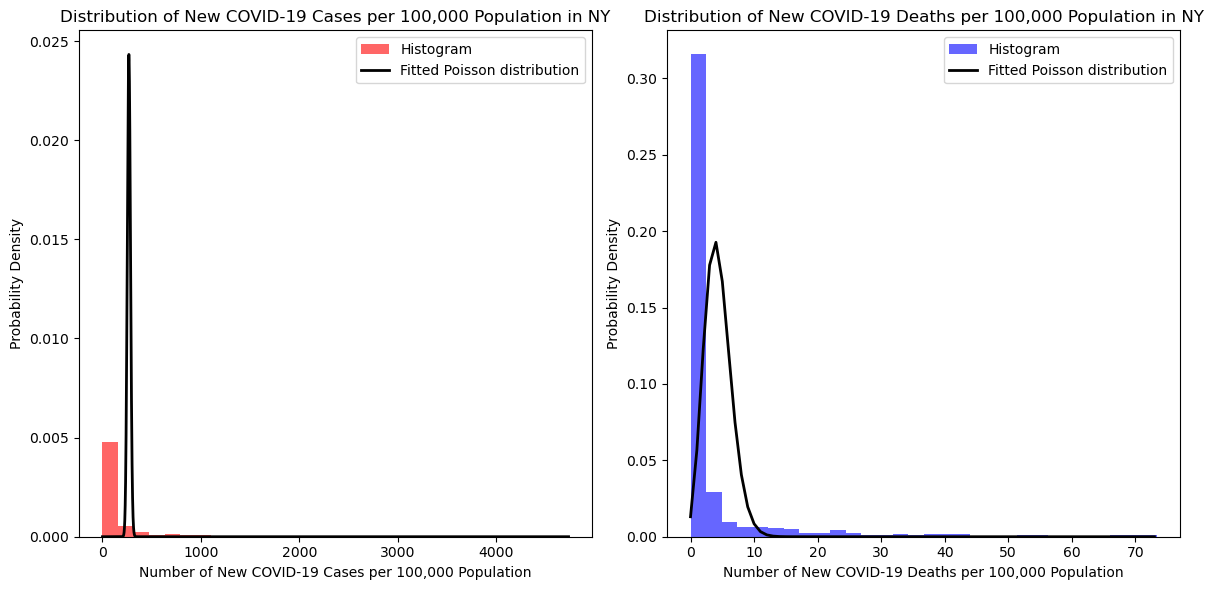

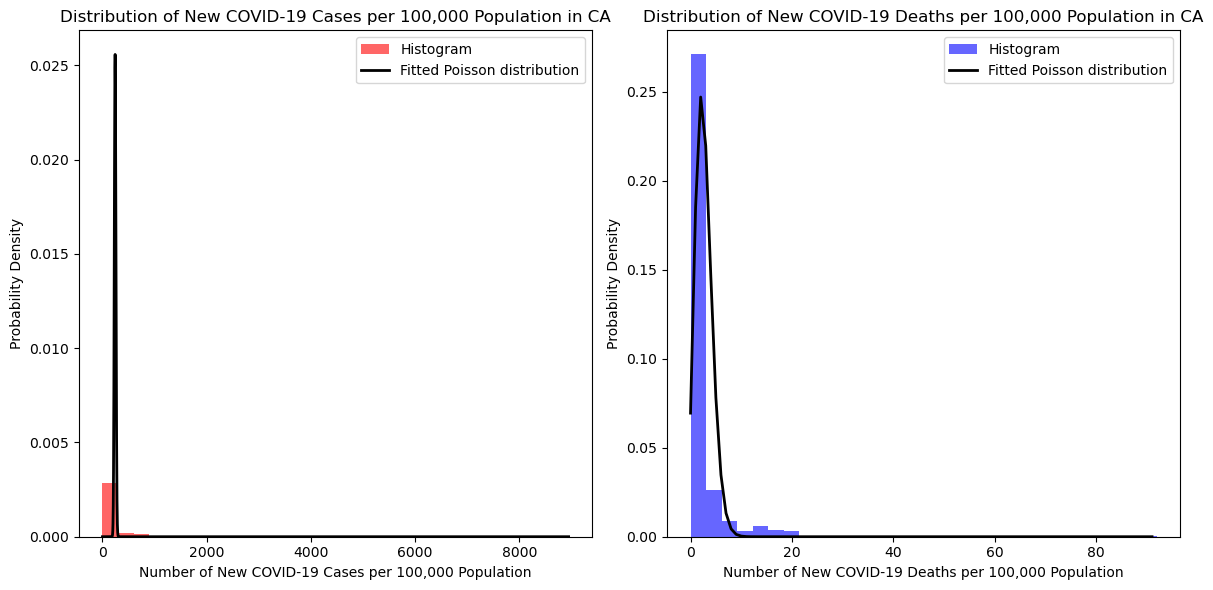

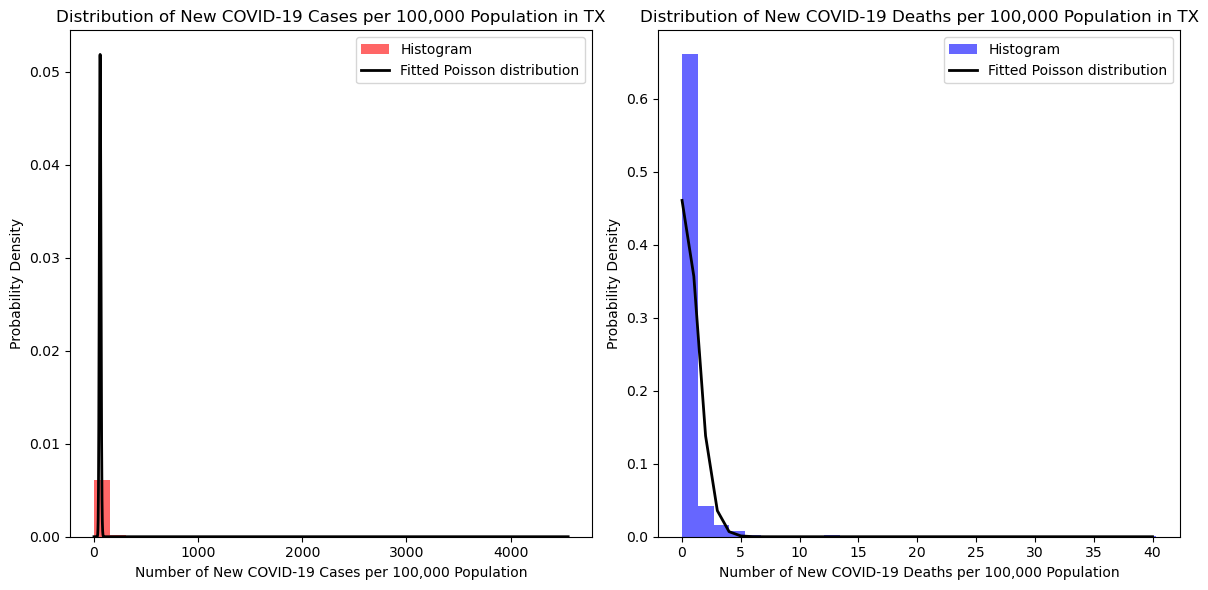

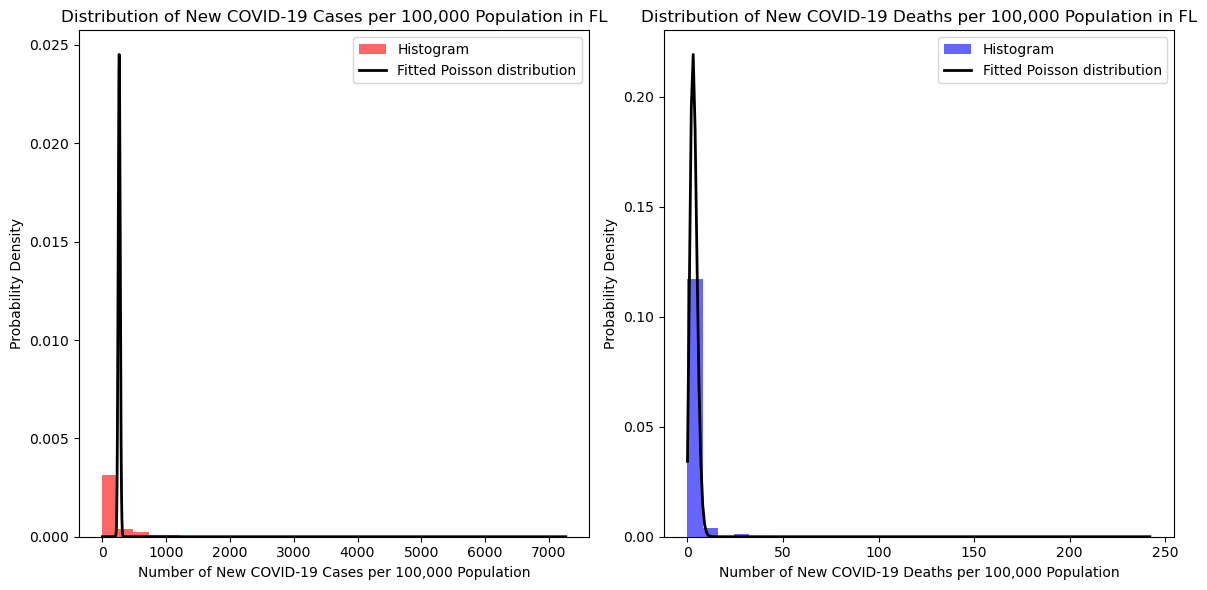

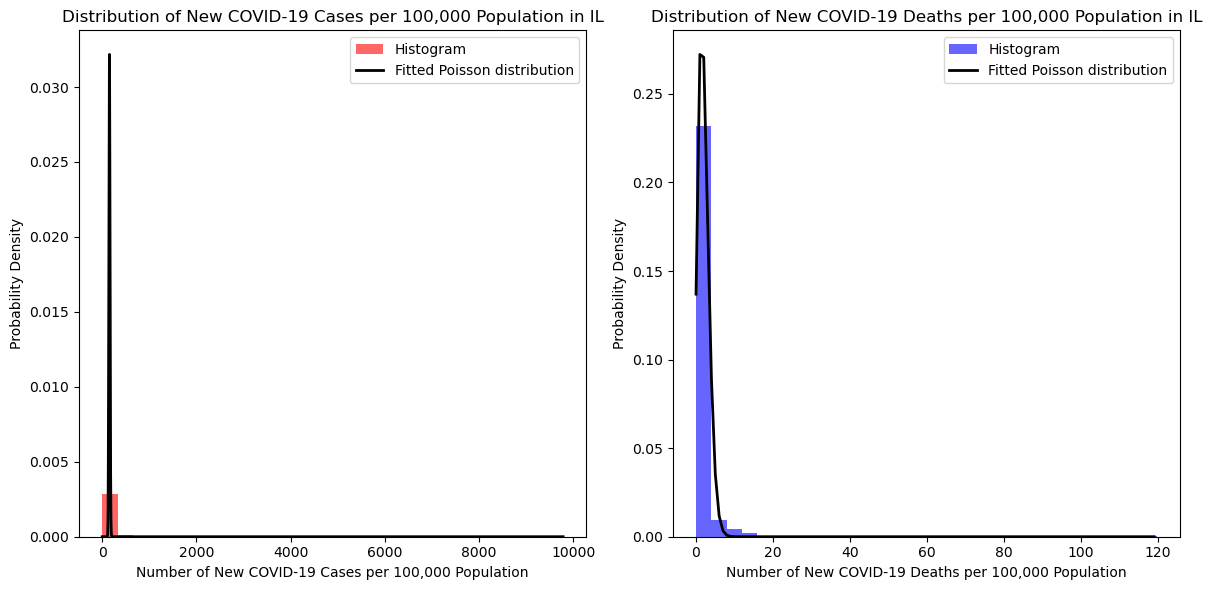

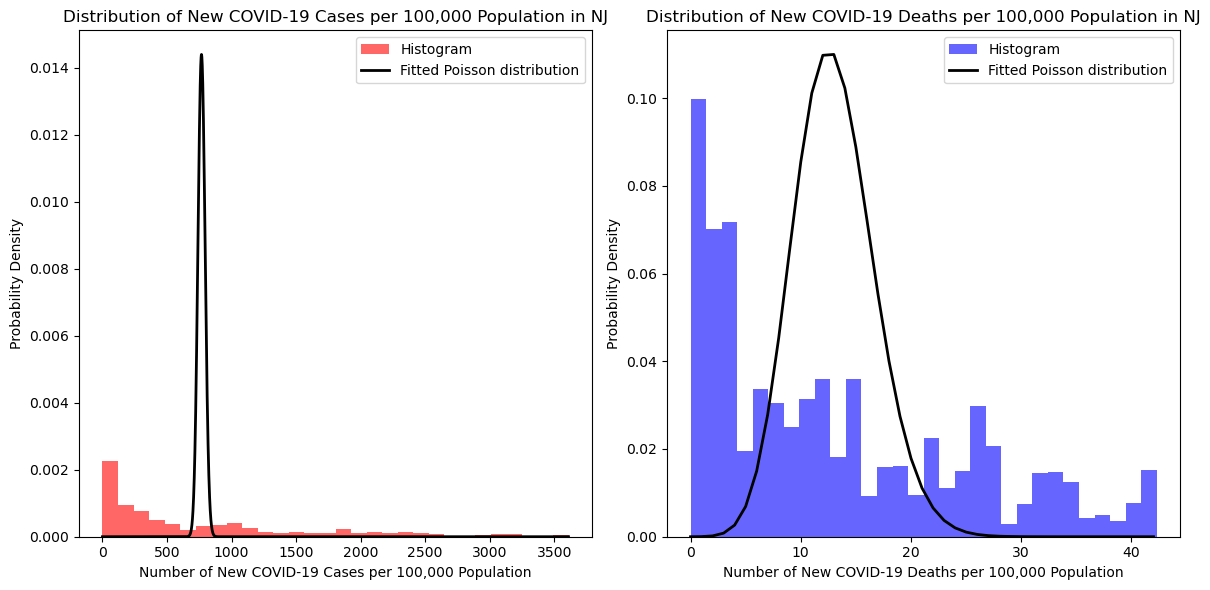

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

covid_cases_data = pd.read_csv("covid_confirmed_usafacts.csv")
covid_deaths_data = pd.read_csv("covid_deaths_usafacts.csv")
covid_population_data = pd.read_csv("covid_county_population_usafacts.csv")

states = ['NY', 'CA', 'TX', 'FL', 'IL', 'NJ']
for state in states:
    # Filter data for the current state
    state_cases_data = covid_cases_data[covid_cases_data['State'] == state]
    state_deaths_data = covid_deaths_data[covid_deaths_data['State'] == state]
    state_population_data = covid_population_data[covid_population_data['State'] == state]
    
    # Calculate population of the current state
    population_of_state = state_population_data['population'].sum()

    # Adjust cases and deaths to new cases and deaths per 100,000 population
    state_cases = state_cases_data.iloc[:, 4:].values.flatten()
    state_deaths = state_deaths_data.iloc[:, 4:].values.flatten()
    state_cases_per_100k = state_cases / (population_of_state / 100000)
    state_deaths_per_100k = state_deaths / (population_of_state / 100000)
    
    # Fit Poisson distributions to the adjusted COVID-19 cases and deaths data
    mean_lambda_cases = np.mean(state_cases_per_100k)
    mean_lambda_deaths = np.mean(state_deaths_per_100k)
    
    # Generate data points for the fitted Poisson distributions
    x_poisson_cases = np.arange(int(np.min(state_cases_per_100k)), int(np.max(state_cases_per_100k)) + 1)
    x_poisson_deaths = np.arange(int(np.min(state_deaths_per_100k)), int(np.max(state_deaths_per_100k)) + 1)
    pmf_poisson_cases = poisson.pmf(x_poisson_cases, mu=mean_lambda_cases)
    pmf_poisson_deaths = poisson.pmf(x_poisson_deaths, mu=mean_lambda_deaths)
    
    # Plot histograms of the adjusted COVID-19 cases and deaths data along with the fitted Poisson distributions
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(state_cases_per_100k, bins=30, density=True, alpha=0.6, color='r', label='Histogram')
    plt.plot(x_poisson_cases, pmf_poisson_cases, 'k-', lw=2, label='Fitted Poisson distribution')
    plt.xlabel('Number of New COVID-19 Cases per 100,000 Population')
    plt.ylabel('Probability Density')
    plt.title(f'Distribution of New COVID-19 Cases per 100,000 Population in {state}')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.hist(state_deaths_per_100k, bins=30, density=True, alpha=0.6, color='b', label='Histogram')
    plt.plot(x_poisson_deaths, pmf_poisson_deaths, 'k-', lw=2, label='Fitted Poisson distribution')
    plt.xlabel('Number of New COVID-19 Deaths per 100,000 Population')
    plt.ylabel('Probability Density')
    plt.title(f'Distribution of New COVID-19 Deaths per 100,000 Population in {state}')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

The Poisson modeling assumes that COVID-19 cases and deaths occur independently at a constant average rate 
(mean lambda) over time and space. This means that the number of cases or deaths in a given time period 
follows a Poisson distribution with the mean equal to lambda. 

The original modeling may involve more complex statistical techniques or machine learning algorithms to 
capture patterns and trends in the data. It may also consider factors such as seasonality, population 
density, healthcare capacity, and interventions like social distancing and vaccination.

The main difference lies in the assumption of a fixed average rate of occurrence in Poisson modeling, 
while the original modeling may allow for more flexibility and sophistication in capturing the dynamics 
of the COVID-19 pandemic.